# Simple Diffusion Model Example (Stable Diffusion Concept) with PyTorch
This notebook introduces the basic concept of diffusion models, which are generative models used for image synthesis. Stable Diffusion is a popular implementation. Here, we provide a minimal illustrative example for beginners.

## What is a Diffusion Model?
A diffusion model generates data (like images) by gradually adding noise to data and then learning to reverse this process to recover the original data. The model is trained to denoise step by step, eventually generating new samples from pure noise.

Key concepts:
- **Forward process**: Gradually adds noise to data.
- **Reverse process**: The model learns to remove noise step by step.
- **Score-based/denoising model**: Learns to predict the noise or the clean data at each step.

## Minimal Example: 1D Diffusion Process
We use a simple 1D example to illustrate the core idea. (For real images, the process is similar but in higher dimensions.)

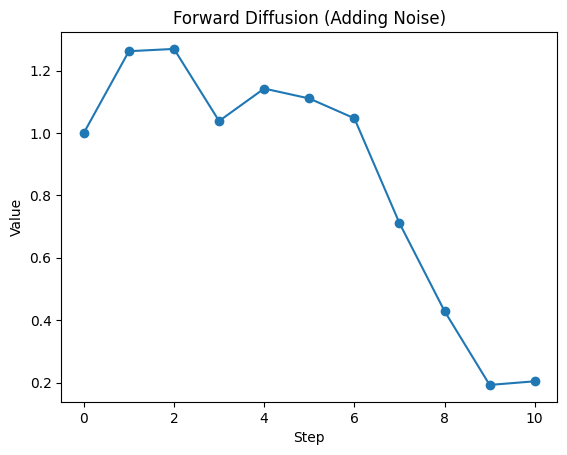

In [1]:
import torch
import matplotlib.pyplot as plt

# Forward diffusion process: add noise
x_start = torch.tensor([1.0])  # Original data
T = 10  # Number of steps
noisy = [x_start]
for t in range(1, T+1):
    noise = torch.randn_like(x_start) * 0.2
    x = noisy[-1] + noise
    noisy.append(x)

plt.plot(range(T+1), [x.item() for x in noisy], marker='o')
plt.title('Forward Diffusion (Adding Noise)')
plt.xlabel('Step')
plt.ylabel('Value')
plt.show()

## Reverse (Denoising) Process (Illustrative)
In practice, a neural network is trained to reverse the noise. Here, we show a simple denoising step for illustration.

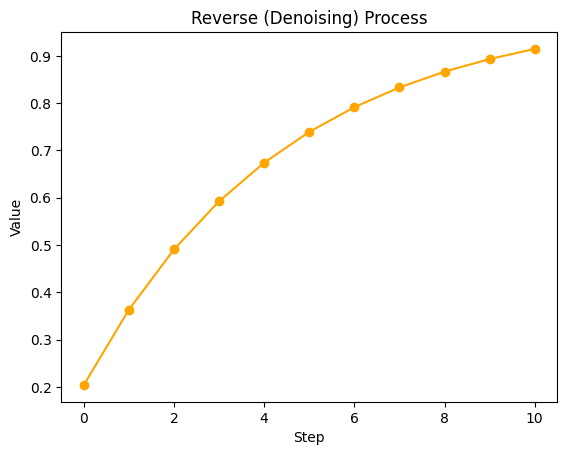

In [2]:
# Simple denoising: move value closer to the original
x = noisy[-1]
denosed = [x]
for t in range(T):
    x = x - 0.2 * (x - x_start)  # Move towards original
    denosed.append(x)

plt.plot(range(T+1), [x.item() for x in denosed], marker='o', color='orange')
plt.title('Reverse (Denoising) Process')
plt.xlabel('Step')
plt.ylabel('Value')
plt.show()

## Summary
This notebook provides a minimal illustration of the diffusion model concept. Real diffusion models (like Stable Diffusion) use deep neural networks and operate on high-dimensional data (images), but the core idea is similar: learn to reverse a noise process to generate new data.